## **Import Libraries**

In [1]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## **Preprocessing Data**

In [2]:
# Importing the dataset
dataset = pd.read_csv('Facebook_Ads.csv')

# Read the dataset
dataset

,Names,Time Spent on Site,Salary,Clicked
0,Martina Avila,25.649648,55330.06006,0
1,Harlan Barnes,32.456107,79049.07674,1
2,Naomi Rodriquez,20.945978,41098.60826,0
3,Jade Cunningham,54.039325,37143.35536,1
4,Cedric Leach,34.249729,37355.11276,0
...,...,...,...,...
494,Rigel,19.222746,44969.13495,0
495,Walter,22.665662,41686.20425,0
496,Vanna,35.320239,23989.80864,0
497,Pearl,26.539170,31708.57054,0


**- Pengecekan tipe data**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   Time Spent on Site  499 non-null    float64
 2   Salary              499 non-null    float64
 3   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.7+ KB


**- Penghapusan kolom tak terpakai**

In [4]:
# Menghapus kolom tertentu dari DataFrame
dataset.drop(columns=['Names'], inplace=True)

dataset

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


**- Korelasi**

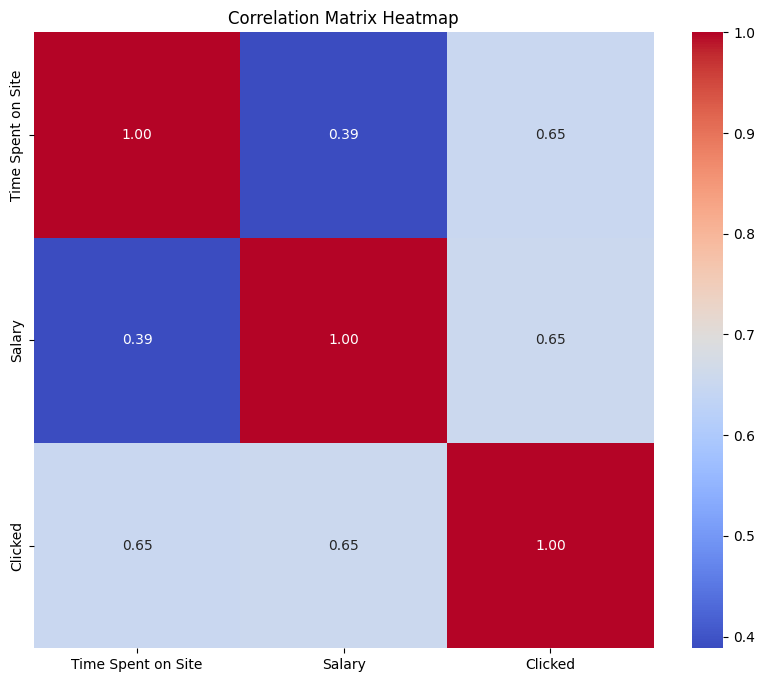

In [5]:
# Exclude non-numeric columns from the correlation matrix
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## **Membangun Model**

In [6]:
# Assuming the dataset has 5 columns and you want to access the 0 and 1st columns
# Adjust the column index if needed
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

In [7]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Menambah output layer
MesinKlasifikasi.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size=10, epochs=100)

# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)

Epoch 1/100
40/40 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5464
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.7218
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.8271
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.8221
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.8321
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6079 - accuracy: 0.8346
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.8396
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5310 - accuracy: 0.8496
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8647
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.8797
Epoch 11/

In [10]:
# Menghitung akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


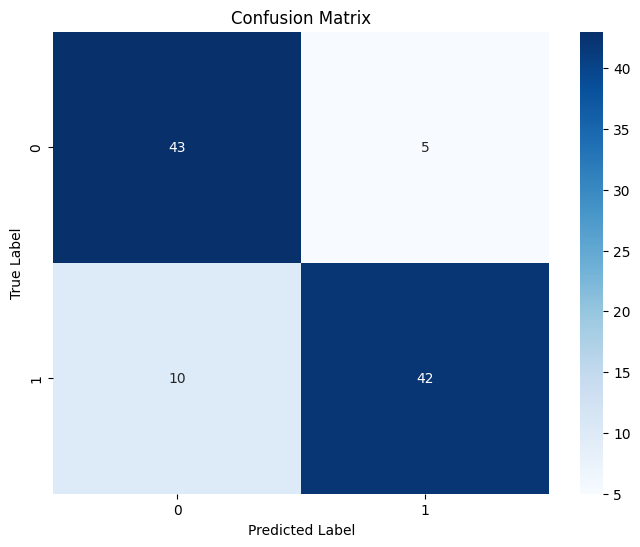

In [11]:
# Membuat visualisasi confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()